In [1]:
from Import import *

In [54]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

<class 'tuple'>


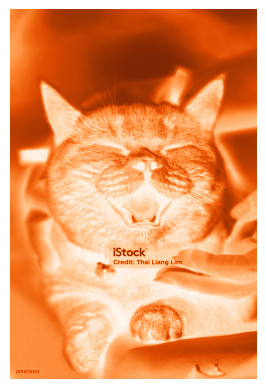

In [60]:
img = cv.imread("target.jpg")
print(type(img.shape))
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img, cmap='Oranges')
#plt.imshow(img,)
plt.axis('off')
plt.show()

In [61]:
type(img)

numpy.ndarray

In [4]:
sum = np.sum(img, axis=1)
sum

array([278931, 278916, 278876, ..., 148873, 148995, 149119], dtype=uint64)

In [5]:
img.shape[1]

1365

In [6]:
sum.shape

(2048,)

In [7]:
def get_boundary_sum(img):
    horizontal_top = img[0,:]
    horizontal_bottom = img[-1,:]
    vertical_left = img[:,0]
    vertical_right = img[:,-1]
    boundary_sum = np.sum(horizontal_top) + np.sum(horizontal_bottom) + np.sum(vertical_left) + np.sum(vertical_right)-horizontal_top[0]-horizontal_top[-1]-horizontal_bottom[0]-horizontal_bottom[-1]
    return boundary_sum

In [8]:
get_boundary_sum(img)
img2 = np.copy(img)

In [9]:
#replace middle 
img2[img.shape[0]//2, img.shape[1]//2] = get_boundary_sum(img)

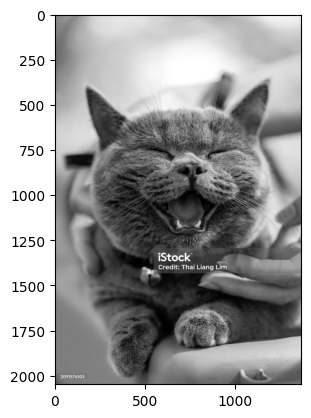

In [10]:
plt.imshow(img2, cmap='gray')

In [11]:
def get_diagonal_sum(img):
    diagonal_1 = np.trace(img)
    diagonal_2 = np.trace(np.fliplr(img))
    diagonal_sum = diagonal_1 + diagonal_2 - img[img.shape[0]//2, img.shape[1]//2]
    return diagonal_sum

In [12]:
get_diagonal_sum(img)

np.uint64(392592)

In [13]:
img2[img.shape[0]//2, img.shape[1]//2] = get_diagonal_sum(img2)

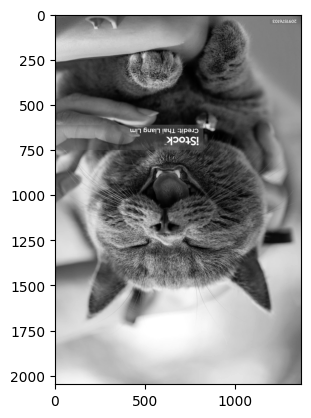

In [14]:
plt.imshow(np.flip(img2), cmap='gray')

In [15]:
img

array([[127, 126, 125, ..., 235, 234, 234],
       [126, 126, 126, ..., 235, 234, 234],
       [125, 126, 126, ..., 235, 234, 234],
       ...,
       [ 89,  90,  90, ..., 117, 117, 117],
       [ 89,  89,  89, ..., 119, 119, 119],
       [ 88,  88,  88, ..., 124, 124, 124]], dtype=uint8)

In [16]:
def split(img):
    img1 = img[:img.shape[0]//2, :img.shape[1]//2]
    img2 = img[:img.shape[0]//2, img.shape[1]//2:]
    img3 = img[img.shape[0]//2:, :img.shape[1]//2]
    img4 = img[img.shape[0]//2:, img.shape[1]//2:]
    return img1, img2, img3, img4

In [51]:
img1, img2, img3, img4 = split(img)

(np.float64(-0.5), np.float64(682.5), np.float64(1023.5), np.float64(-0.5))

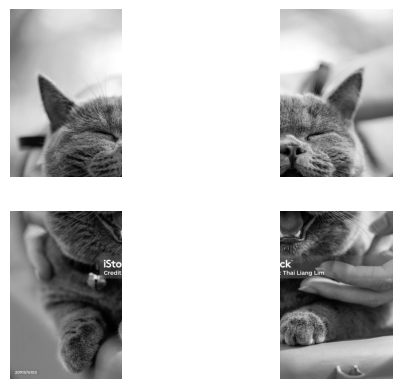

In [53]:
plt.subplot(2,2,1)
plt.imshow(img1, cmap='gray')
plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(img2, cmap='gray')
plt.axis("off")
plt.subplot(2,2,3)
plt.imshow(img3, cmap='gray')
plt.axis("off")
plt.subplot(2,2,4)
plt.imshow(img4, cmap='gray')
plt.axis("off")


In [19]:
img2 = np.copy(img)

In [62]:
img2 = np.reshape(img2,img2.shape[0]*img2.shape[1])

In [63]:
img2

array([192, 192, 192, ..., 110, 109, 109], dtype=uint8)

In [21]:
img2=np.sort(img2)
img2.shape

(2795520,)

In [22]:
hist = np.zeros(256)
for i in img2:
    hist[i] = hist[i]+1

In [66]:
hist

array([  410.,  3553.,  3090.,  3135.,  4636.,  4821.,  5170.,  5859.,
        5240.,  5654.,  6007.,  6137.,  6475.,  6299.,  6173.,  6218.,
        6027.,  6012.,  6074.,  6217.,  6360.,  6658.,  6774.,  6954.,
        7139.,  7067.,  7129.,  7092.,  6807.,  6517.,  6496.,  6581.,
        6592.,  6817.,  7121.,  7074.,  7344.,  7740.,  8007.,  8228.,
        8573.,  9024.,  9491.,  9796., 10130., 10550., 11010., 11601.,
       12098., 12873., 13796., 13801., 14185., 14800., 16327., 17061.,
       17242., 16965., 16693., 15563., 14875., 14881., 14868., 14835.,
       14724., 14230., 13727., 13742., 14050., 14404., 14190., 14308.,
       14360., 14278., 14149., 14055., 14235., 14391., 14008., 14037.,
       13907., 13654., 13326., 12944., 12792., 12835., 12507., 12490.,
       12462., 12538., 12071., 11856., 11828., 11547., 11454., 11357.,
       11412., 11458., 11886., 11685., 12238., 12215., 12055., 12058.,
       12305., 12151., 12801., 12427., 12449., 12525., 11752., 11336.,
      

In [65]:
np.arange(256)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

<BarContainer object of 256 artists>

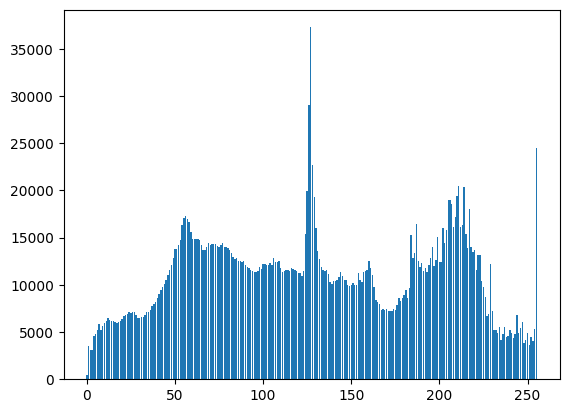

In [35]:
plt.bar(np.arange(256),hist)

In [46]:
hist_difference = np.array([x if i%5 == 0 else 0 for i,x in enumerate(hist)])

In [47]:
for i in hist_difference:
    print(i)

410.0
0.0
0.0
0.0
0.0
4821.0
0.0
0.0
0.0
0.0
6007.0
0.0
0.0
0.0
0.0
6218.0
0.0
0.0
0.0
0.0
6360.0
0.0
0.0
0.0
0.0
7067.0
0.0
0.0
0.0
0.0
6496.0
0.0
0.0
0.0
0.0
7074.0
0.0
0.0
0.0
0.0
8573.0
0.0
0.0
0.0
0.0
10550.0
0.0
0.0
0.0
0.0
13796.0
0.0
0.0
0.0
0.0
17061.0
0.0
0.0
0.0
0.0
14875.0
0.0
0.0
0.0
0.0
14230.0
0.0
0.0
0.0
0.0
14190.0
0.0
0.0
0.0
0.0
14055.0
0.0
0.0
0.0
0.0
13907.0
0.0
0.0
0.0
0.0
12835.0
0.0
0.0
0.0
0.0
12071.0
0.0
0.0
0.0
0.0
11357.0
0.0
0.0
0.0
0.0
12238.0
0.0
0.0
0.0
0.0
12151.0
0.0
0.0
0.0
0.0
11752.0
0.0
0.0
0.0
0.0
11521.0
0.0
0.0
0.0
0.0
11242.0
0.0
0.0
0.0
0.0
19934.0
0.0
0.0
0.0
0.0
15978.0
0.0
0.0
0.0
0.0
11459.0
0.0
0.0
0.0
0.0
10397.0
0.0
0.0
0.0
0.0
10954.0
0.0
0.0
0.0
0.0
9954.0
0.0
0.0
0.0
0.0
10464.0
0.0
0.0
0.0
0.0
12487.0
0.0
0.0
0.0
0.0
8154.0
0.0
0.0
0.0
0.0
7401.0
0.0
0.0
0.0
0.0
7340.0
0.0
0.0
0.0
0.0
8945.0
0.0
0.0
0.0
0.0
12831.0
0.0
0.0
0.0
0.0
12275.0
0.0
0.0
0.0
0.0
12871.0
0.0
0.0
0.0
0.0
12370.0
0.0
0.0
0.0
0.0
18947.0
0.0
0.0
0.0
0.0
19427.0

In [48]:
hist_difference.shape

(256,)

<BarContainer object of 256 artists>

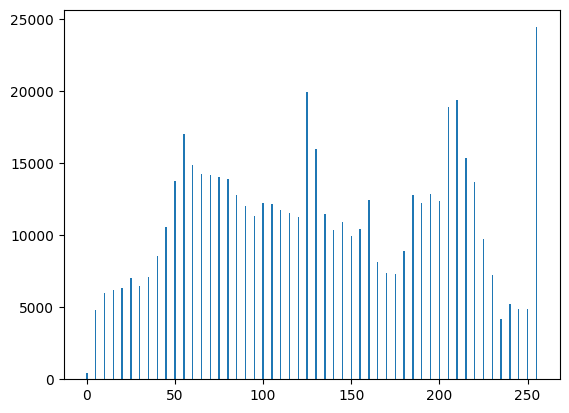

In [49]:
plt.bar(np.arange(256),hist_difference)

In [50]:
img2 = np.copy(img)